<a href="https://colab.research.google.com/github/oscarsiamo/Arreglo-de-Antenas-/blob/master/script_colvec_precipitaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import subprocess
import geopandas as gpd
import re
from geopy import Point
from geopy.distance import distance

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# mapa de Colombia
colvec=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/colvecdep.txt')

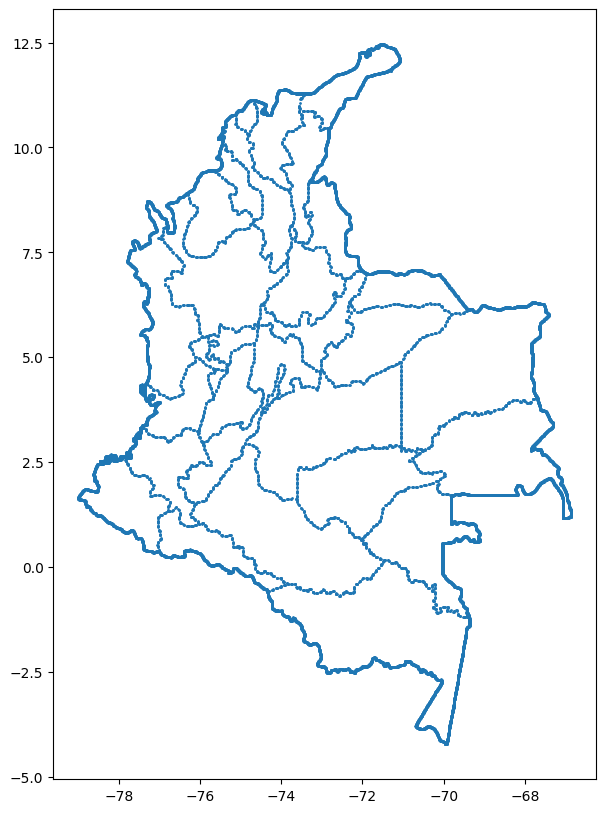

In [7]:
plt.figure(figsize=(7,10))
plt.scatter(colvec[:,0],colvec[:,1],s=1)

In [8]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Visor de espectro v2.xlsx')
df_Guajira=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación_guajira.xlsx')
df_Vichada=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Vichada.xlsx')
df_Nariño=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Nariño.xlsx')
df_Meta_Guainía=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Meta_Guainía.xlsx')
df_Meta=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Meta.xlsx')
df_Casanare=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Casanare.xlsx')
df_Arauca=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Arauca.xlsx')
df_Amazonas=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Amazonas.xlsx')
df_Cauca=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mapa de colombia vectorizado/Precipitación Cauca.xlsx')


In [9]:
df=np.array(df) # se convierte a un arreglo de datos
df_Guajira=np.array(df_Guajira)
df_Vichada=np.array(df_Vichada)
df_Nariño=np.array(df_Nariño)
df_Meta_Guainía=np.array(df_Meta_Guainía)
df_Meta=np.array(df_Meta)
df_Casanare=np.array(df_Casanare)
df_Arauca=np.array(df_Arauca)
df_Amazonas=np.array(df_Amazonas)
df_Cauca=np.array(df_Cauca)

In [10]:
centro_latitud = 4.7
centro_longitud = -70.1

# Definir el radio del círculo en grados
radio_grados = 0.8

# Crear una malla de puntos para el círculo
num_puntos = 100
theta = np.linspace(0, 2*np.pi, num_puntos)
radio_latitud = radio_grados * np.cos(theta) + centro_latitud
radio_longitud = radio_grados * np.sin(theta) + centro_longitud

In [15]:
# Definir las coordenadas del centro del óvalo
centro_latitud = 4.6
centro_longitud = -74.1

# Definir los semiejes mayor y menor del óvalo en grados
semieje_mayor_grados = 0.5
semieje_menor_grados = 0.3

# Crear una malla de puntos para el óvalo
num_puntos = 100
theta = np.linspace(0, 2*np.pi, num_puntos)
ovalo_latitud = semieje_mayor_grados * np.cos(theta) + centro_latitud
ovalo_longitud = semieje_menor_grados * np.sin(theta) + centro_longitud

In [11]:
def convertir_coordenadas(coordenada):
    # Extraer los componentes de grados, minutos y segundos utilizando expresiones regulares
    patron = r'(\d+)° (\d+)' + r"' (\d+\.\d+)" + r'"'
    resultado = re.match(patron, coordenada)
    grados = int(resultado.group(1))
    minutos = int(resultado.group(2))
    segundos = float(resultado.group(3))

    # Calcular el valor decimal
    valor_decimal = grados + minutos / 60 + segundos / 3600

    return valor_decimal

In [12]:
coordenadas_convertidas_2 = np.copy(df)
coordenadas_convertidas_2[:, 11] = np.vectorize(convertir_coordenadas)(df[:, 11])
coordenadas_convertidas_2[:, 12] = np.vectorize(convertir_coordenadas)(df[:, 12])

Text(0.5, 1.0, 'Relative Humidity RGB')

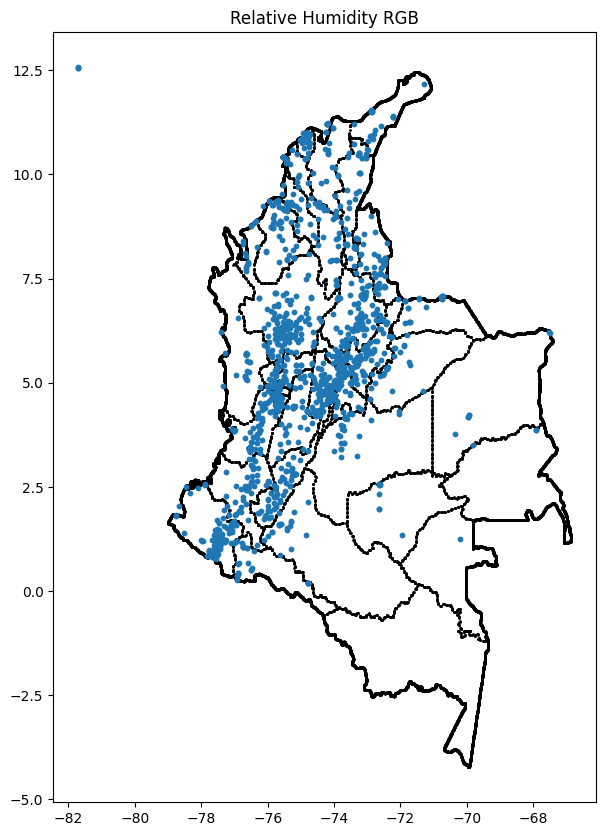

In [13]:
plt.figure(figsize=(7,10))
plt.scatter(colvec[:,0],colvec[:,1],s=1,c='black')
plt.scatter(coordenadas_convertidas_2[:, 11]*-1,coordenadas_convertidas_2[:, 12],s=10)
plt.title("Relative Humidity RGB")

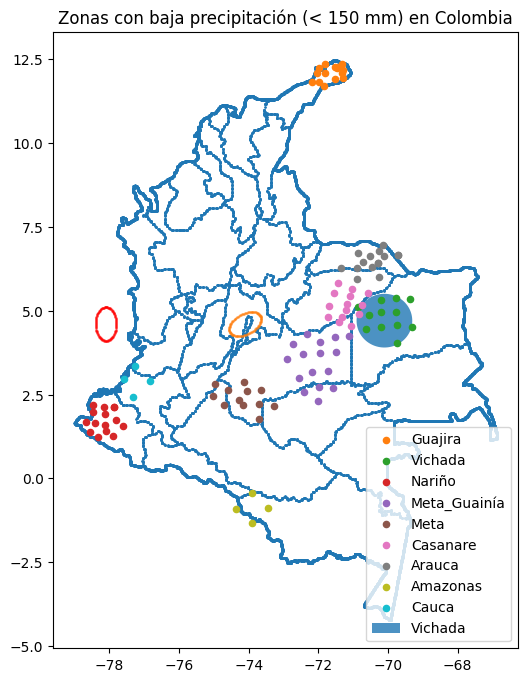

In [38]:
plt.figure(figsize=(6,8))
plt.scatter(colvec[:,0],colvec[:,1],s=1)
# plt.scatter(coordenadas_convertidas_2[:, 11]*-1,coordenadas_convertidas_2[:, 12],s=2,label='antenas FM')
plt.scatter(df_Guajira[:, 1],df_Guajira[:, 0],s=20,label='Guajira',zorder=1)
plt.scatter(df_Vichada[:, 1],df_Vichada[:, 0],s=20,label='Vichada',zorder=3)
plt.scatter(df_Nariño[:, 1],df_Nariño[:, 0],s=20,label='Nariño',zorder=4)
plt.scatter(df_Meta_Guainía[:, 1],df_Meta_Guainía[:, 0],s=20,label='Meta_Guainía',zorder=5)
plt.scatter(df_Meta[:, 1],df_Meta[:, 0],s=20,label='Meta',zorder=6)
plt.scatter(df_Casanare[:, 0],df_Casanare[:, 1],s=20,label='Casanare',zorder=7)
plt.scatter(df_Arauca[:, 1],df_Arauca[:, 0],s=20,label='Arauca',zorder=8)
plt.scatter(df_Amazonas[:, 0],df_Amazonas[:, 1],s=20,label='Amazonas',zorder=9)
plt.scatter(df_Cauca[:, 0],df_Cauca[:, 1],s=20,label='Cauca',zorder=10)
plt.fill(radio_longitud, radio_latitud, alpha=0.8,label='Vichada',zorder=2)
plt.scatter(ovalo_longitud, ovalo_latitud, s=1, alpha=0.5,zorder=3)
plt.legend(loc=4)
plt.title("Zonas con baja precipitación (< 150 mm) en Colombia")

graficar_ovalo_inclinado(4.6, -78.1, 0.5, 0.3, 0,'red')

In [19]:
# Definir las coordenadas del centro del óvalo
centro_latitud = 4.6
centro_longitud = -74.1

# Definir los semiejes mayor y menor del óvalo en grados
semieje_mayor_grados = 0.5
semieje_menor_grados = 0.3

# Definir el ángulo de inclinación en radianes
angulo_inclinacion_rad = np.pi/3  # Por ejemplo, un ángulo de inclinación de 30 grados

# Crear una malla de puntos para el óvalo sin inclinación
num_puntos = 100
theta = np.linspace(0, 2*np.pi, num_puntos)
ovalo_latitud_sin_inclinacion = semieje_mayor_grados * np.cos(theta)
ovalo_longitud_sin_inclinacion = semieje_menor_grados * np.sin(theta)

# Aplicar la transformación de rotación al óvalo
matriz_rotacion = np.array([[np.cos(angulo_inclinacion_rad), -np.sin(angulo_inclinacion_rad)],
                            [np.sin(angulo_inclinacion_rad), np.cos(angulo_inclinacion_rad)]])
ovalo_latitud, ovalo_longitud = np.dot(matriz_rotacion, np.array([ovalo_latitud_sin_inclinacion, ovalo_longitud_sin_inclinacion]))

# Trasladar el óvalo al centro deseado
ovalo_latitud += centro_latitud
ovalo_longitud += centro_longitud


In [36]:
def graficar_ovalo_inclinado(centro_latitud, centro_longitud, semieje_mayor_grados, semieje_menor_grados, angulo_inclinacion_grados, color):
    # Convertir el ángulo de inclinación de grados a radianes
    angulo_inclinacion_rad = np.radians(angulo_inclinacion_grados)

    # Crear una malla de puntos para el óvalo sin inclinación
    num_puntos = 100
    theta = np.linspace(0, 2*np.pi, num_puntos)
    ovalo_latitud_sin_inclinacion = semieje_mayor_grados * np.cos(theta)
    ovalo_longitud_sin_inclinacion = semieje_menor_grados * np.sin(theta)

    # Aplicar la transformación de rotación al óvalo
    matriz_rotacion = np.array([[np.cos(angulo_inclinacion_rad), -np.sin(angulo_inclinacion_rad)],
                                [np.sin(angulo_inclinacion_rad), np.cos(angulo_inclinacion_rad)]])
    ovalo_latitud, ovalo_longitud = np.dot(matriz_rotacion, np.array([ovalo_latitud_sin_inclinacion, ovalo_longitud_sin_inclinacion]))

    # Trasladar el óvalo al centro deseado
    ovalo_latitud += centro_latitud
    ovalo_longitud += centro_longitud
    plt.scatter(ovalo_longitud, ovalo_latitud, s=1, alpha=0.5,c=color)


In [ ]:
def graficar_circulo(centro_latitud,centro_longitud,radio_grados,)
    centro_latitud = 4.7
    centro_longitud = -70.1

    # Definir el radio del círculo en grados
    radio_grados = 0.8

    # Crear una malla de puntos para el círculo
    num_puntos = 100
    theta = np.linspace(0, 2*np.pi, num_puntos)
    radio_latitud = radio_grados * np.cos(theta) + centro_latitud
    radio_longitud = radio_grados * np.sin(theta) + centro_longitud